# Task 1 EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
#Read csv file into a DF
df = pd.read_csv('sample_sales_data.csv')
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


### Date cleaning  
Check for data types, missing values, duplicated rows and typos.

In [5]:
df.dtypes

Unnamed: 0          int64
transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [6]:
#only need to change timestamp to date format
df['timestamp']=pd.to_datetime(df['timestamp'])

In [7]:
#check data types
df.dtypes

Unnamed: 0                 int64
transaction_id            object
timestamp         datetime64[ns]
product_id                object
category                  object
customer_type             object
unit_price               float64
quantity                   int64
total                    float64
payment_type              object
dtype: object

In [8]:
#check null values
df.isna().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [9]:
#Check for duplicates
df.duplicated().sum()

0

In [10]:
#check for typos
df.customer_type.value_counts()

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64

In [11]:
#check for typos
df.category.value_counts()

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64

## Descriptive Statistics 

In [7]:
#get summary stats for data
df.describe()

,Unnamed: 0,timestamp,unit_price,quantity,total
count,7829.000000,7829,7829.000000,7829.000000,7829.000000
mean,3914.000000,2022-03-04 13:41:47.803550976,7.819480,2.501597,19.709905
min,0.000000,2022-03-01 09:00:13,0.190000,1.000000,0.190000
25%,1957.000000,2022-03-02 16:31:31,3.990000,1.000000,6.570000
50%,3914.000000,2022-03-04 14:03:33,7.190000,3.000000,14.970000
75%,5871.000000,2022-03-06 11:34:45,11.190000,4.000000,28.470000
max,7828.000000,2022-03-07 19:59:54,23.990000,4.000000,95.960000
std,2260.181962,NaN,5.388088,1.122722,17.446680


In [188]:
#combine unit pirce and total columns into data frame
des = pd.DataFrame({'unit_price': df.unit_price, 'total': df.total })

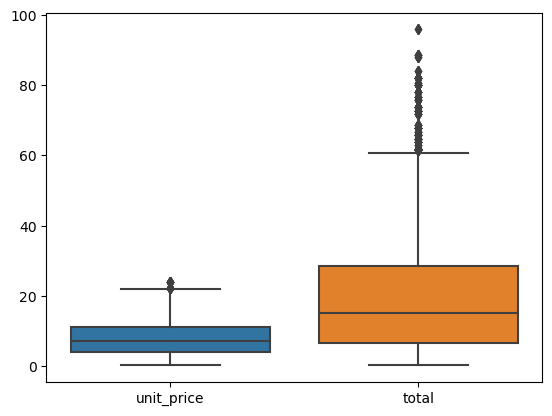

In [189]:
#create a box plot
sns.boxplot(data = des )
plt.show();

C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


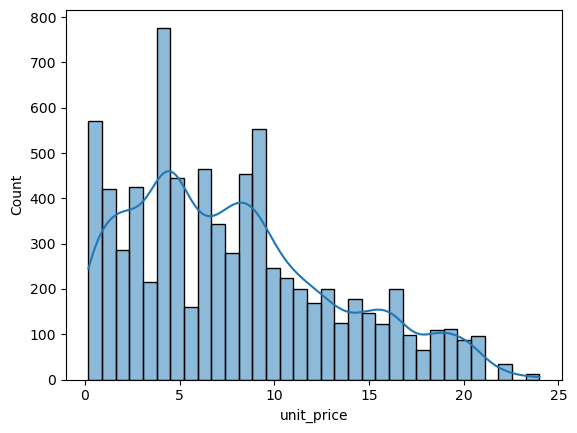

In [54]:
#create a histplot to see distribution of unit price
sns.histplot(df.unit_price, kde= True)
plt.show();


C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


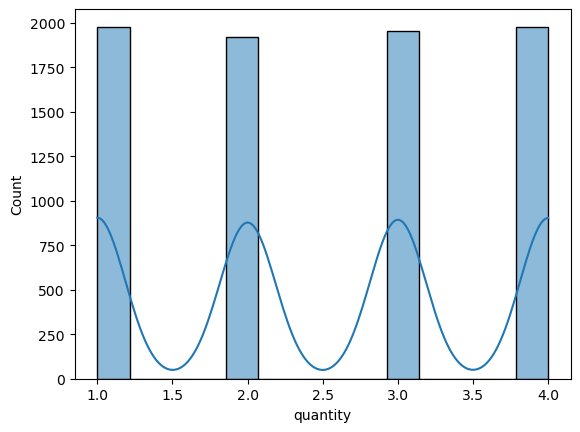

In [55]:
#create a histplot to see distribution of quantity
sns.histplot(df.quantity, kde= True)
plt.show();

C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


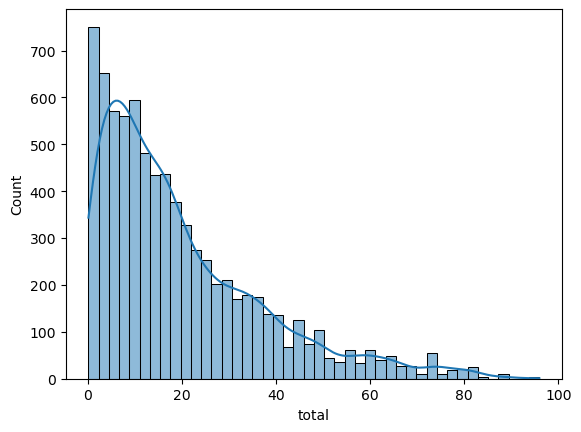

In [56]:
#create a histplot to see distribution of total
sns.histplot(df.total, kde= True)
plt.show();

In [64]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [184]:
#sort customer_type and category into groups with the top 10 categories by quantity
df_quant_top = df.groupby(['customer_type', 'category'])['quantity'].sum().groupby('customer_type', group_keys = False).nlargest(10).reset_index()


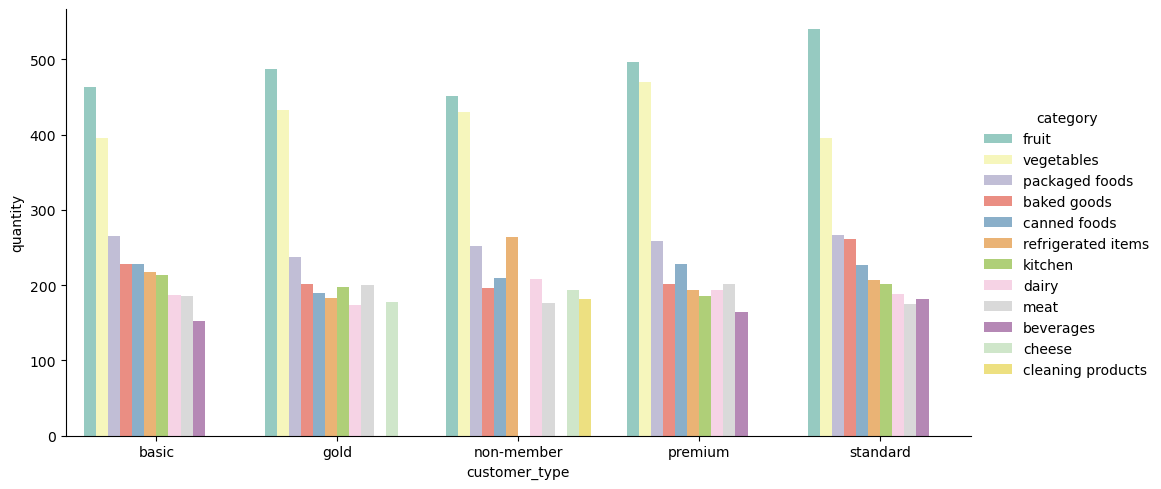

In [185]:
#Create Catplot to view top categories for each customer type
sns.catplot(data = df_quant_top, x = 'customer_type', y='quantity', hue='category', kind='bar', aspect = 2, palette='Set3')
plt.show();

In [186]:
#sort customer_type and category into groups with bottom top 10 categories by quantity
df_quant_bot = df.groupby(['customer_type', 'category'])['quantity'].sum().groupby('customer_type', group_keys = False).nsmallest(10).reset_index()


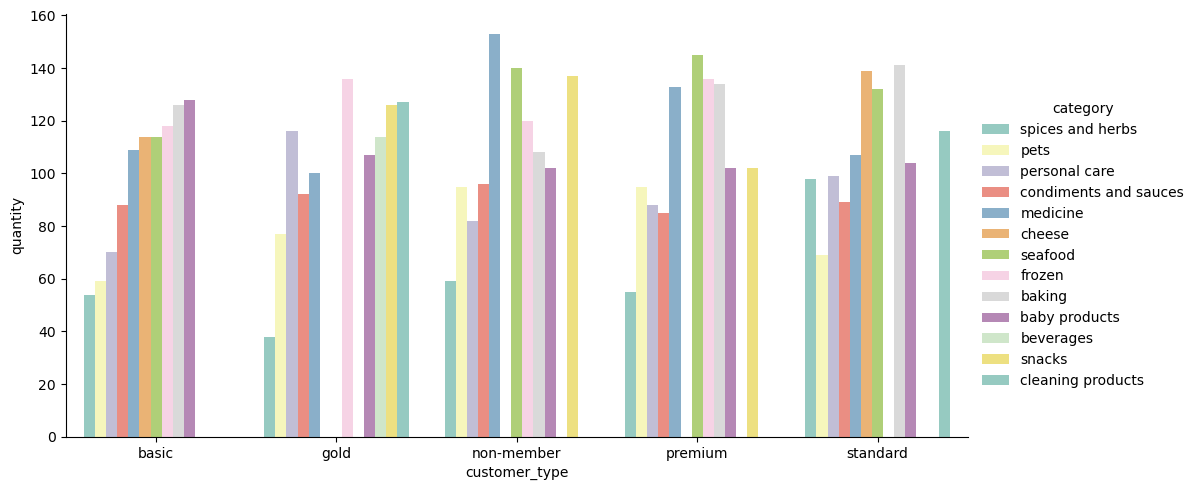

In [187]:
#Create Catplot to view bottom categories for each customer type
sns.catplot(data = df_quant_bot, x = 'customer_type', y='quantity', hue='category', kind='bar', aspect = 2, palette='Set3')
plt.show();

In [190]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [198]:
df.dtypes

Unnamed: 0          int64
transaction_id     object
timestamp           int32
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [225]:
#convert timestamp to date day column extracting the day
df['dateday']= df.timestamp.dt.to_period('d').dt.to_timestamp()

In [226]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,dateday
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2022-03-02
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,2022-03-06
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,2022-03-04
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,2022-03-02
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,2022-03-05


In [227]:
#Group day by quantity
df_time_series = df.groupby(['dateday'])['quantity'].sum().reset_index()
df_time_series

,dateday,quantity
0,2022-03-01,2904
1,2022-03-02,2921
2,2022-03-03,2723
3,2022-03-04,2776
4,2022-03-05,2707
5,2022-03-06,2781
6,2022-03-07,2773


C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


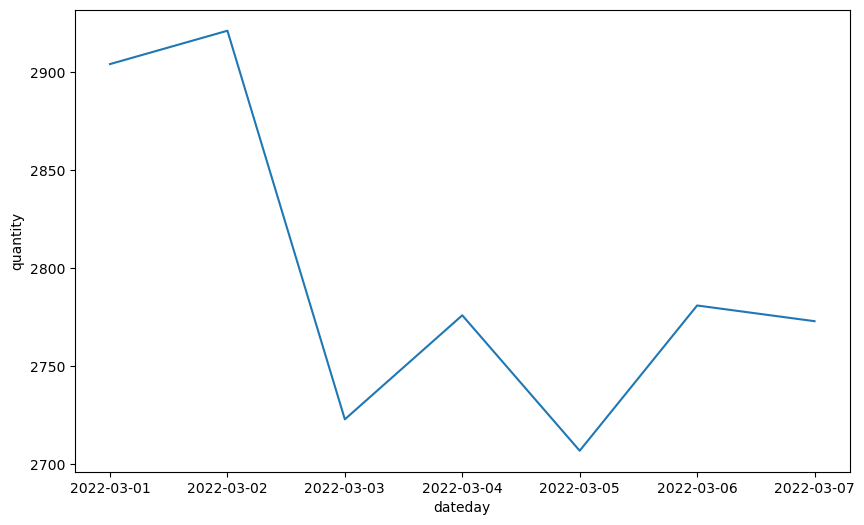

In [230]:
#Show lineplot of quantity sold on each day.
plt.figure(figsize=(10,6))
sns.lineplot(data = df_time_series, x = 'dateday', y='quantity')
plt.show()

In [231]:
#Group day by total
df_time_series = df.groupby(['dateday'])['total'].sum().reset_index()
df_time_series

,dateday,total
0,2022-03-01,22183.96
1,2022-03-02,22500.79
2,2022-03-03,21405.47
3,2022-03-04,22262.64
4,2022-03-05,21803.03
5,2022-03-06,21865.79
6,2022-03-07,22287.17


C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


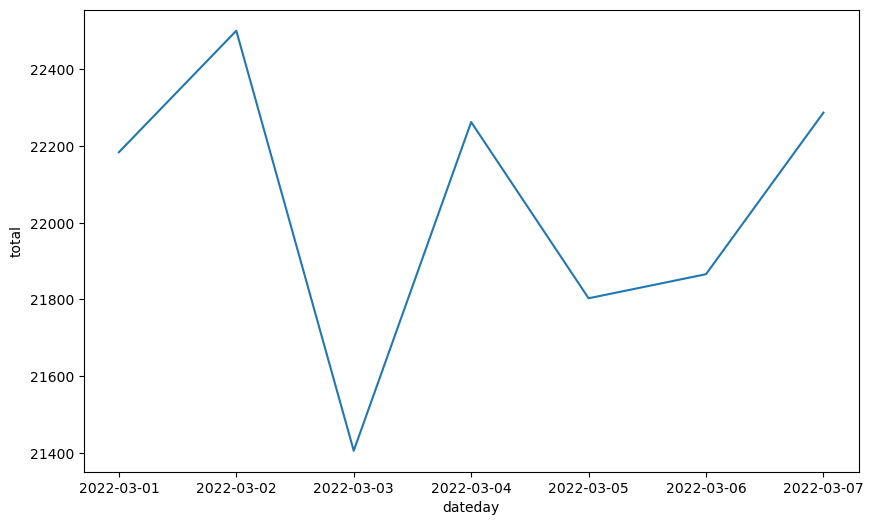

In [233]:
#Show lineplot for totals on each day
plt.figure(figsize=(10,6))
sns.lineplot(data = df_time_series, x = 'dateday', y='total')
plt.show()

In [235]:
#Extract hour from day
df['hour']=df['timestamp'].dt.hour

In [236]:
#Group hour by quantity to find quantity sold for each hour
df_time_series = df.groupby(['hour'])['quantity'].sum().reset_index()
df_time_series

,hour,quantity
0,9,1825
1,10,1764
2,11,1907
3,12,1793
4,13,1698
5,14,1768
6,15,1711
7,16,1812
8,17,1757
9,18,1785


C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


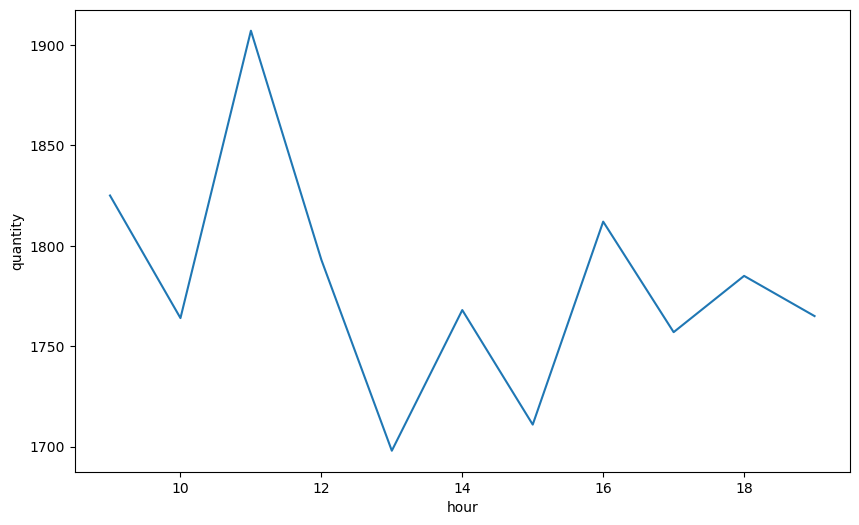

In [237]:
#Plot to see quantity sold each hour
plt.figure(figsize=(10,6))
sns.lineplot(data = df_time_series, x = 'hour', y='quantity')
plt.show()

In [298]:
#Group category and hour by quantity and select top 5 hours which show top 5 categories for each hour
df_cat_hour = df.groupby(['category','hour'])['quantity'].sum().groupby('hour', group_keys=False).nlargest(5).reset_index()
#convert hour to string type
df_cat_hour['hour']= df_cat_hour['hour'].astype(str)

In [299]:
df_cat_hour

,category,hour,quantity
0,fruit,9,254
1,vegetables,9,181
2,refrigerated items,9,115
3,baked goods,9,111
4,canned foods,9,111
5,fruit,10,244
6,vegetables,10,221
7,packaged foods,10,138
8,baked goods,10,121
9,refrigerated items,10,100


In [300]:
df_cat_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  55 non-null     object
 1   hour      55 non-null     object
 2   quantity  55 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


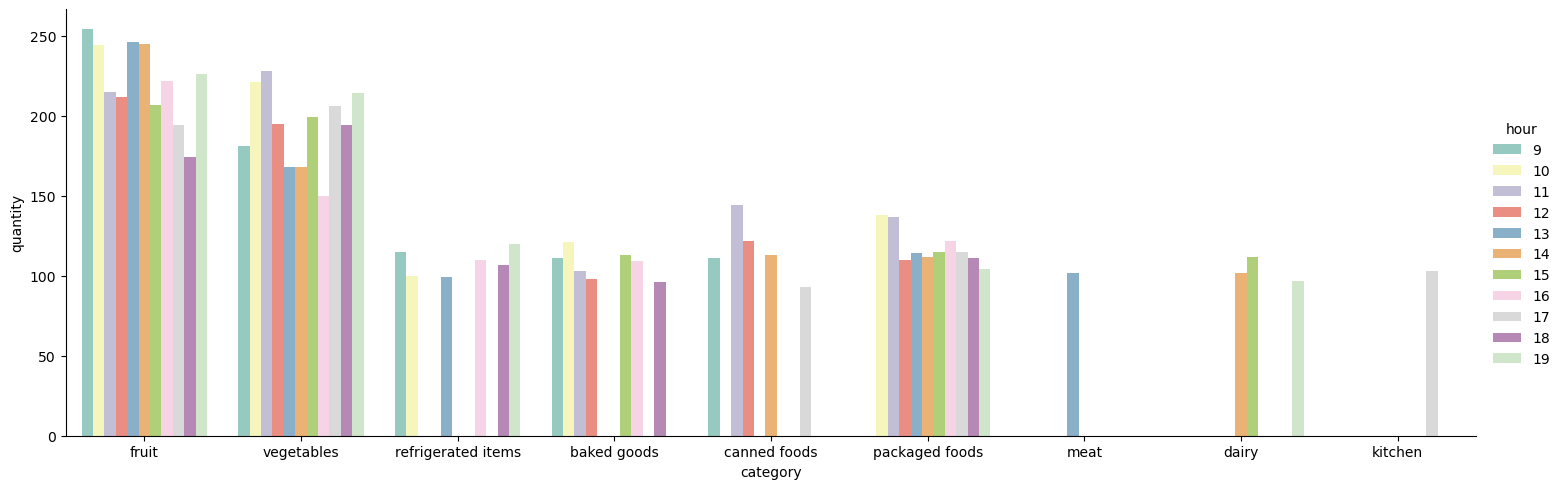

In [303]:
#show catplot to visual top 5 categories for each hour
sns.catplot(data=df_cat_hour, x='category',y='quantity', hue='hour', aspect = 3, kind='bar',palette = 'Set3')
plt.show()